# Drawing modular times tables with Matplotlib / Pyplot

A modular times table is a table of multiplication results for a given number, where the results are calculated modulo another number. There is a way of pictorially representing these tables that creates beautiful, intricate patterns. The key steps are:

1. Start with a circle and evenly space points around the perimeter, representing the numbers 0 to the chosen modulus (called *m*).
2. Choose a multiplier (called *a*) by which to multiply all numbers on the circle.
3. Multiply each number on the circle by *a* and take the remainder when divided by *m*; then, connect the point with the one corresponding to the result of the modular multiplication.

For example, if *m* = 7 and *a* = 2:
* 0 is connected to itself because (0 * 2) % 7 = 0
* 1 is connected to 2 because (1 * 2) % 7 = 2
* 2 is connected to 4 because (2 * 2) % 7 = 4
* 3 is connected to 6 because (3 * 2) % 7 = 6
* 4 is connected to 1 because (4 * 2) % 7 = 1
* 5 is connected to 3 because (5 * 2) % 7 = 3
* 6 is connected to 5 because (6 * 2) % 7 = 5

As we increase *m* for a fixed *a*, intricate shapes begin to emerge, such as the cardioid (heart-shaped) curve for the *a* = 2 table, the nephroid (kidney-shaped) curve for the *a* = 3 table, and more complex petal-like shapes for higher tables.

In this notebook, we will use Matplotlib to draw these times tables. We will also add customization options to color the lines in different ways.


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colormaps as mpl_colormaps

import custom_cmaps
import ipywidgets as widgets
from IPython.display import display, clear_output

## Functions to generate the plot

In [8]:
# Collect custom colormaps
cmaps_list = [*custom_cmaps.sequential, *custom_cmaps.cyclic]
mycmaps = {cmap.name: cmap for cmap in cmaps_list}

# Create outer circle
angles = np.linspace(0, 2*np.pi, 500)
circle_x = np.cos(angles)
circle_y = np.sin(angles)


def draw_line(start, end, color, width, opacity):
    """
    Draws a line between two points with specified color, line width, and opacity.
    """
    plt.plot([start[0], end[0]], [start[1], end[1]], ls='-', color=color, lw=width, alpha=opacity)


def length(start, end):
    """
    Calculates the squared distance between two points, divided by 4.
    """
    return ((start[0]-end[0])**2 + (start[1]-end[1])**2)/4


def angle(start, end):
    """
    Calculates the angle between two points in radians, normalized to a [0, 1] range.
    """
    if abs(start[0]-end[0]) < 1.e-10:
        return 1
    return np.arctan((start[1]-end[1])/(start[0]-end[0]))/np.pi + 0.5


def draw_chart(m, a, color, width, opacity, option):
    """
    Generates and displays a multiplication chart based on parameters m and a, with styling options.
    Supports different coloring modes for the lines drawn between points on the circle.
    """
    plt.figure(figsize=(10, 8))
    plt.cla()
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'm = {m}      a = {a}')
    numbers = np.array([*range(m)])
    numbers_partners = (numbers*a) % m
    numbers_angles = numbers * 2 * np.pi / m
    numbers_coords = np.array([np.cos(numbers_angles), np.sin(numbers_angles)])
    if option == 'monochrome':
        plt.plot(circle_x, circle_y, ls='-', color=color, lw=width)
        for i in numbers:
            draw_line(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]], color, width, opacity)
    else:
        try:
            colormap = mpl_colormaps[color]
        except ValueError:
            colormap = mycmaps[color]
        if option == 'origin':
            for i in numbers:
                draw_line(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]], colormap(i/m), width, opacity)
        elif option == 'length':
            for i in numbers:
                draw_line(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]], colormap(length(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]])), width, opacity)
        else:
            for i in numbers:
                draw_line(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]], colormap(angle(numbers_coords[:, i], numbers_coords[:, numbers_partners[i]])), width, opacity)
    plt.show()

## Interactively draw the plot

In [7]:
# Create widgets
m_field = widgets.IntText(value=200, description='m:')
a_field = widgets.IntText(value=82, description='a:')
color_field = widgets.Text(value='blue', description='Color/Map:')
width_field = widgets.FloatSlider(value=0.5, min=0, max=3, step=0.1, description='Line width:')
opacity_field = widgets.FloatSlider(value=1, min=0, max=1, step=0.1, description='Opacity:')
cmode = widgets.Dropdown(options=['monochrome', 'origin', 'length', 'angle'], value='monochrome', description='Color mode:')
draw_button = widgets.Button(description='Draw Chart')

# Define function to run when the button is clicked
def on_draw_button_clicked(b):
    with output:
        clear_output(wait=True)
        draw_chart(m_field.value, a_field.value, color_field.value, width_field.value, opacity_field.value, cmode.value)

draw_button.on_click(on_draw_button_clicked)

# Organize widgets into rows
rows = [widgets.HBox([m_field, a_field]),
        widgets.HBox([cmode, color_field]),
        widgets.HBox([width_field, opacity_field]),
        widgets.HBox([draw_button])]
form = widgets.VBox(rows)

# Display the form
output = widgets.Output()
display(form, output)


Output()

## Supporting material
### Display available colormaps

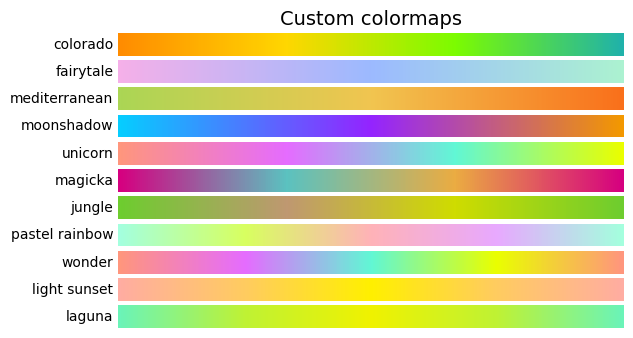

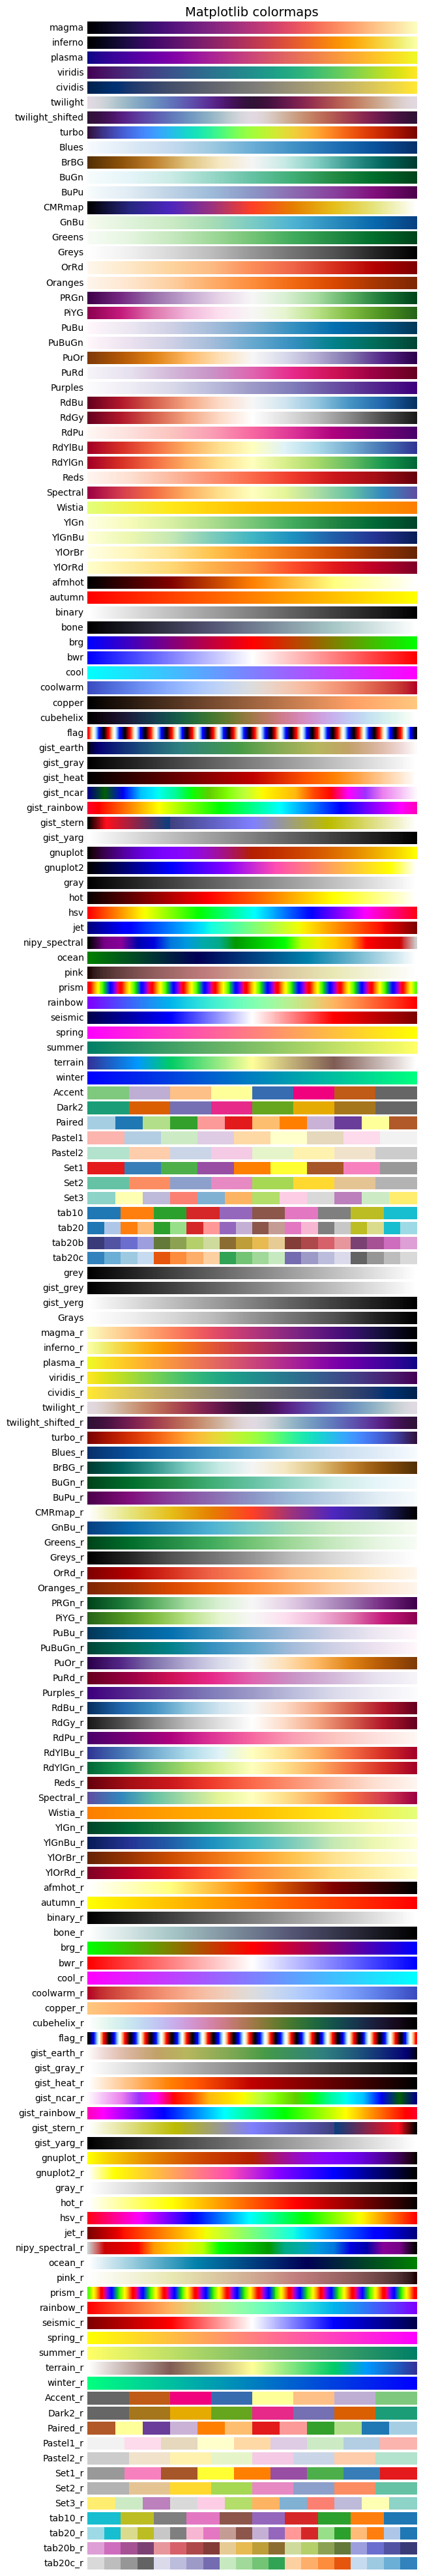

In [ ]:
def show_cmaps(cmap_type='custom'):
    # cmap_type='custom' to display custom colormaps, cmap_type='matplotlib' to display Matplotlib's built-in colormaps.

    if cmap_type == 'custom':
        colormaps = {cmap.name: cmap for cmap in custom_cmaps.sequential + custom_cmaps.cyclic}
    elif cmap_type == 'matplotlib':
        colormaps = {name: mpl_colormaps[name] for name in mpl_colormaps()}

    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    nrows = len(colormaps)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    title = 'Custom colormaps' if cmap_type == 'custom' else 'Matplotlib colormaps'
    axs[0].set_title(title, fontsize=14)

    for ax, (name, cmap) in zip(axs, colormaps.items()):
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10, transform=ax.transAxes)
        ax.set_axis_off()

    plt.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99, hspace=0.2, wspace=0.4)
    plt.show()


show_cmaps('custom')
show_cmaps('matplotlib')